In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [2]:
#csv dosyasını okuyup pandas dataframe'e ekleme işlemi
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price']
df = pd.read_csv('/content/drive/MyDrive/housing.csv',header=None, delimiter=r"\s+", names=column_names)


In [5]:
# Veri setinin ilk ve son 5 değeri
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
 # Veri setindeki parametreler ve açıklamaları

 # CRIM     per capita crime rate by town
 # ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 # INDUS    proportion of non-retail business acres per town
 # CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 # NOX      nitric oxides concentration (parts per 10 million)
 # RM       average number of rooms per dwelling
 # AGE      proportion of owner-occupied units built prior to 1940
 # DIS      weighted distances to five Boston employment centres
 # RAD      index of accessibility to radial highways
 # TAX      full-value property-tax rate per $10,000
 # PTRATIO  pupil-teacher ratio by town
 # B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 # LSTAT    % lower status of the population
 # MEDV     Median value of owner-occupied homes in $1000's

In [3]:
#csv dosyasında null değer olup olmadığını kontrol etme işlemi
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [6]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Price      float64
dtype: object

In [7]:
cr = df.corr()

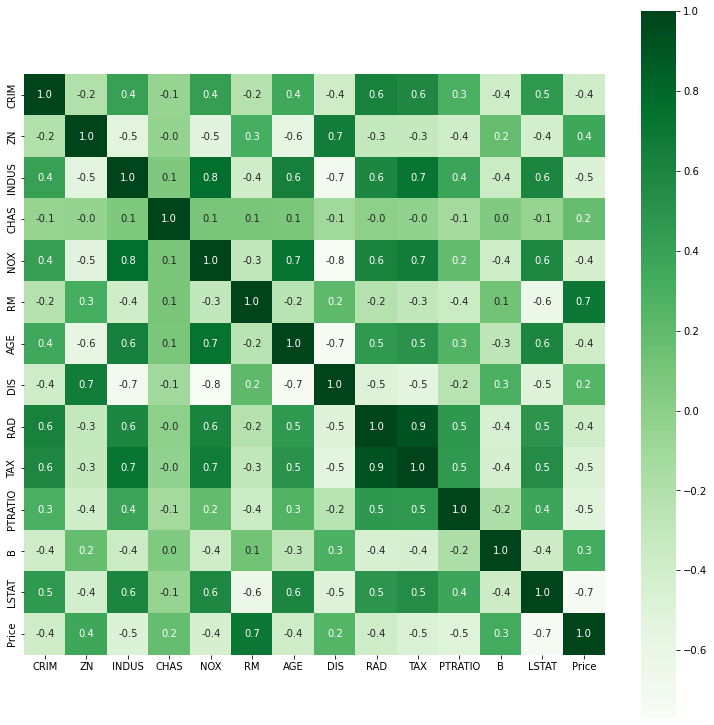

In [8]:
# Verilerin arasındaki korelasyonu anlamak için bunu matplotlib.pyplot ve seaborn kütüphanesi ile tabloda çizdirme işlemi
plt.figure(figsize=(13,13))
sns.heatmap(cr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')

In [9]:
# Veri setindeki fiyatı etkileyecek değişkenleri x'e fiyatı Y'ye atama işlemi(x=fiyatı belirleyen değişkenler, y ise fiyattır)
X = df.drop(['Price'], axis=1)
#X = df[['RM', 'LSTAT']]
Y = df['Price']

In [35]:
# Veri setini train ve test olarak ikiye ayırma işlemi() testsize=0.09, randomstat=3  t=0.4,r=1  t=0.25,r=2  t=0.35,r=3  t=0.35,r=0  t=0.15,r=2  t=0.35,r=10  t=0.3,r=21 t=256r=8
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.256,random_state=8,)

In [36]:
# Modeli Linear Regression olarak belirleme işlemi(Multiple Linear Regression)
#model_MLR = LinearRegression()
model_lr = LinearRegression()

In [37]:
# Modeli Train etme işlemi
model_lr.fit(X_train, Y_train)

LinearRegression()

In [38]:
# Training verileri için R^2 regresyon skoru(coefficient of determination)
Ytr_predicted = model_lr.predict(X_train)
metrics.r2_score(Y_train,Ytr_predicted)
#math.sqrt(model_lr.score(X_train,Y_train))

0.7419635013783443

In [39]:
# Test verileri için R^2 regresyon skoru(coefficient of determination)
Y_predicted = model_lr.predict(X_test)
metrics.r2_score(Y_test,Y_predicted)

0.727858122118

In [42]:
#train verisinin hata değerleri
print("mean absolute error = "+str(metrics.mean_absolute_error(Y_train,Ytr_predicted)))
print("mean squared error = "+str(metrics.mean_squared_error(Y_train,Ytr_predicted)))
print('\033[1m'+"mean_absolute_percentage_error = %"+str(metrics.mean_absolute_percentage_error(Y_train,Ytr_predicted)*100)+'\033[0m')

mean absolute error = 3.259384278390906
mean squared error = 21.688592942449787
mean_absolute_percentage_error = %16.396423670486865


In [43]:
#test verisinin hata değerleri
print("mean absolute error = "+str(metrics.mean_absolute_error(Y_test,Y_predicted)))
print("mean squared error = "+str(metrics.mean_squared_error(Y_test,Y_predicted)))
print('\033[1m'+"mean_absolute_percentage_error = %"+str(metrics.mean_absolute_percentage_error(Y_test,Y_predicted)*100)+'\033[0m')

mean absolute error = 3.383825746623299
mean squared error = 23.24981492743745
mean_absolute_percentage_error = %17.087377547281122


In [17]:
# Manuel olarak tüm x değerleri girildiğinde tahmin sonucu veren kod parçacığı
model_lr.predict([[0.02731,	0.0,	7.07,	0,	0.469,	6.421,	78.9,	4.9671,	2,	242.0,	17.8,	396.90,	9.14]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([25.38194186])

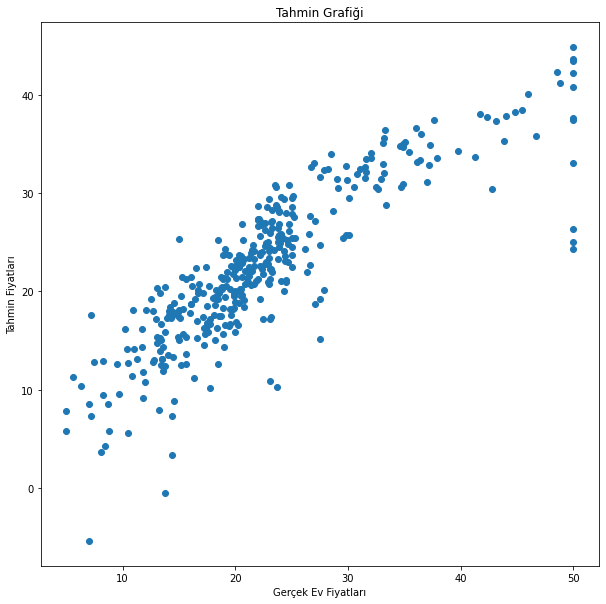

In [44]:
# train verisi için tahmin grafiği
plt.figure(figsize=(10,10))
plt.scatter(Y_train, Ytr_predicted)
plt.title("Tahmin Grafiği")
plt.xlabel("Gerçek Ev Fiyatları")
plt.ylabel("Tahmin Fiyatları")
plt.show()

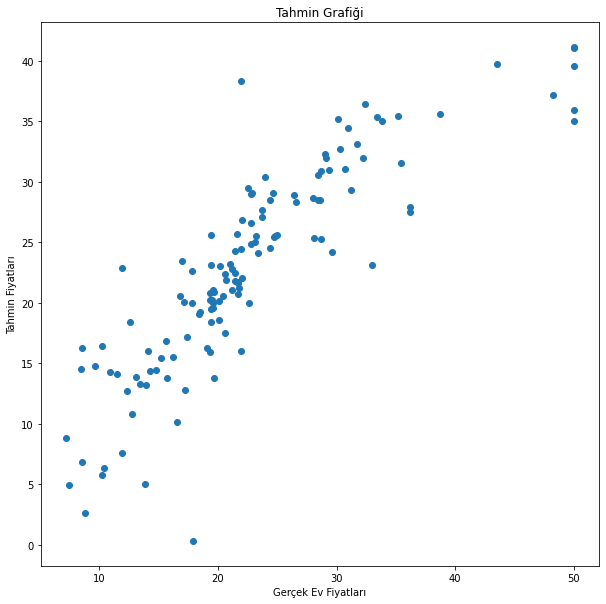

In [45]:
# test verisi için tahmin grafiği
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_predicted)
plt.title("Tahmin Grafiği")
plt.xlabel("Gerçek Ev Fiyatları")
plt.ylabel("Tahmin Fiyatları")
plt.show()

In [ ]:
df.shape

(506, 14)